# 1. Import and Install Dependencies


In [109]:
import cv2
import numpy as np
import os
import shutil
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic


In [110]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities
mp_face_mesh = mp.solutions.face_mesh

In [111]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [112]:
def draw_landmarks(image, results):
    # Draw face mesh
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.face_landmarks, 
            mp_face_mesh.FACEMESH_CONTOURS,
            mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
            mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
        )
    
    # Draw pose connections
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.pose_landmarks, 
            mp_holistic.POSE_CONNECTIONS
        )
    
    # Draw hands
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.left_hand_landmarks, 
            mp_holistic.HAND_CONNECTIONS
        )
    
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.right_hand_landmarks, 
            mp_holistic.HAND_CONNECTIONS
        )

In [113]:
def draw_styled_landmarks(image, results):
    # Draw face connections with error checking
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.face_landmarks, 
            mp_face_mesh.FACEMESH_CONTOURS,
            mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
            mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
        )
    
    # Draw pose connections
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.pose_landmarks, 
            mp_holistic.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
        )
    
    # Draw hand connections
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.left_hand_landmarks, 
            mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
        )
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.right_hand_landmarks, 
            mp_holistic.HAND_CONNECTIONS, 
            mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
        )


In [114]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

I0000 00:00:1744518540.361859   90020 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1744518540.364677  139593 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 25.0.3-arch1.1), renderer: AMD Radeon 680M (radeonsi, rembrandt, LLVM 19.1.7, DRM 3.61, 6.14.1-arch1-1)
W0000 00:00:1744518540.448967  139577 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744518540.503441  139575 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744518540.506195  139581 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744518540.506756  139579 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabl

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [115]:
draw_landmarks(frame, results)

In [116]:
# plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values


In [117]:
# Check if face landmarks are available before trying to access them
if results.face_landmarks:
	print(f"Number of face landmarks detected: {len(results.face_landmarks.landmark)}")
else:
	print("No face landmarks detected in the current frame")

Number of face landmarks detected: 468


In [118]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [119]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [120]:
face = (np.array([[res.x, res.y, res.z] 
                  for res in results.face_landmarks.landmark]).flatten() 
        if results.face_landmarks 
        else np.zeros(1404))


In [121]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [122]:
result_test = extract_keypoints(results)

In [123]:
result_test

array([ 0.49918586,  0.61032492, -1.08143318, ...,  0.        ,
        0.        ,  0.        ])

In [124]:
# np.save('0', result_test)

In [125]:
# np.load('0.npy')

# 4. Setup Folders for Collection


In [126]:
# Define paths and actions
DATA_PATH = os.path.join('MP_Data')
actions = np.array(['Hello', 'Bye', 'Deaf', 'Thanks'])
no_sequences = 30
sequence_length = 30

# 5. Collect Keypoint Values for Training and Testing


In [127]:
# Function to check if data exists
def check_existing_data(data_path, action, sequence_length):
    missing_sequences = []
    action_path = os.path.join(data_path, action)
    for sequence in range(no_sequences):
        sequence_path = os.path.join(action_path, str(sequence))
        # Check if all frames for this sequence exist
        if not os.path.exists(sequence_path) or \
           len(os.listdir(sequence_path)) < sequence_length:
            missing_sequences.append(sequence)
    return missing_sequences

# Function to collect data
def capture_data(actions, sequence_length, no_sequences):
    cap = cv2.VideoCapture(0)
    with mp.solutions.holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        for action in actions:
            print(f"Processing action: {action}")
            
            # Check missing sequences
            missing_sequences = check_existing_data(DATA_PATH, action, sequence_length)
            if not missing_sequences:
                print(f"All data for '{action}' is already collected. Skipping.")
                continue
            
            for sequence in missing_sequences:
                print(f"Collecting data for action '{action}', sequence {sequence}")
                for frame_num in range(sequence_length):
                    ret, frame = cap.read()
                    image, results = mediapipe_detection(frame, holistic)
                    draw_styled_landmarks(image, results)

                    # Display progress
                    if frame_num == 0:
                        cv2.putText(image, f'STARTING COLLECTION for {action} (Seq: {sequence})', (15, 50),
                                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
                        cv2.imshow('OpenCV Feed', image)
                        cv2.waitKey(500)
                    else:
                        cv2.putText(image, f'Collecting frames for {action} (Seq: {sequence})', (15, 50),
                                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 0), 2)

                    # Extract and save keypoints
                    keypoints = extract_keypoints(results)
                    sequence_path = os.path.join(DATA_PATH, action, str(sequence))
                    os.makedirs(sequence_path, exist_ok=True)
                    np.save(os.path.join(sequence_path, str(frame_num)), keypoints)

                    # Display image
                    cv2.imshow('OpenCV Feed', image)

                    # Exit on 'q'
                    if cv2.waitKey(10) & 0xFF == ord('q'):
                        cap.release()
                        cv2.destroyAllWindows()
                        return

        cap.release()
        cv2.destroyAllWindows()


In [128]:
capture_data(actions, sequence_length, no_sequences)

Processing action: Hello
All data for 'Hello' is already collected. Skipping.
Processing action: Bye
All data for 'Bye' is already collected. Skipping.
Processing action: Deaf
All data for 'Deaf' is already collected. Skipping.
Processing action: Thanks
All data for 'Thanks' is already collected. Skipping.


I0000 00:00:1744518543.463322   90020 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1744518543.465751  139677 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 25.0.3-arch1.1), renderer: AMD Radeon 680M (radeonsi, rembrandt, LLVM 19.1.7, DRM 3.61, 6.14.1-arch1-1)
W0000 00:00:1744518543.536488  139660 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744518543.569970  139665 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744518543.573160  139671 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744518543.573482  139666 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabl

# 6. Preprocess Data and Create Labels and Features


In [129]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [130]:
label_map = {label:num for num, label in enumerate(actions)}

In [131]:
label_map

{'Hello': 0, 'Bye': 1, 'Deaf': 2, 'Thanks': 3}

In [132]:
def load_gesture_data(DATA_PATH, actions, sequence_length):
    sequences, labels = [], []
    
    for action in actions:
        action_path = os.path.join(DATA_PATH, action)
        if not os.path.exists(action_path):
            print(f"Warning: Path {action_path} does not exist")
            continue
            
        # Get valid sequence folders and sort them
        sequence_folders = [f for f in os.listdir(action_path) 
                          if os.path.isdir(os.path.join(action_path, f))]
        sequence_numbers = sorted([int(seq) for seq in sequence_folders])
        
        for sequence in sequence_numbers:
            try:
                window = []
                sequence_path = os.path.join(action_path, str(sequence))
                
                # Check if all frame files exist
                frames_exist = all(os.path.exists(os.path.join(sequence_path, f"{frame_num}.npy")) 
                                 for frame_num in range(sequence_length))
                
                if not frames_exist:
                    print(f"Skipping incomplete sequence: {sequence_path}")
                    continue
                    
                # Load frame data
                for frame_num in range(sequence_length):
                    frame_path = os.path.join(sequence_path, f"{frame_num}.npy")
                    res = np.load(frame_path)
                    window.append(res)
                    
                sequences.append(window)
                labels.append(label_map[action])
                
            except Exception as e:
                print(f"Error processing sequence {sequence} for action {action}: {e}")
                continue
                
    return np.array(sequences), np.array(labels)

# Load the data
sequences, labels = load_gesture_data(DATA_PATH, actions, sequence_length)
print(f"Loaded {len(sequences)} sequences")

Loaded 120 sequences


In [133]:
np.array(sequences).shape

(120, 30, 1662)

In [134]:
np.array(labels).shape

(120,)

In [135]:
X = np.array(sequences)

In [136]:
X.shape

(120, 30, 1662)

In [137]:
y = to_categorical(labels).astype(int)

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [139]:
y_test.shape

(6, 4)

# 7. Build and Train Multiple LSTM Neural Network Models

We'll implement and compare 5 different model architectures with various regularization techniques to improve performance and reduce overfitting.

In [140]:
from keras.models import Sequential, Model
from keras.layers import LSTM, Dense, Dropout, Input, BatchNormalization, Bidirectional, GRU
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.regularizers import l2
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import time

In [141]:
# Create logs directory if it doesn't exist
log_dir = os.path.join('Logs')
os.makedirs(log_dir, exist_ok=True)

# Create models directory if it doesn't exist
models_dir = os.path.join('Models')
os.makedirs(models_dir, exist_ok=True)

In [142]:
# Disable GPU usage for this notebook to avoid CUDA errors
tf.config.set_visible_devices([], 'GPU')

In [143]:
# Define callback functions for all models
def get_callbacks(model_name):
    return [
        # TensorBoard logging
        TensorBoard(log_dir=os.path.join(log_dir, model_name)),
        
        # Early stopping to prevent overfitting
        EarlyStopping(
            monitor='val_loss',
            patience=20,
            restore_best_weights=True,
            verbose=1
        ),
        
        # Save the best model during training
        ModelCheckpoint(
            filepath=os.path.join(models_dir, f'{model_name}.keras'),
            monitor='val_loss',
            save_best_only=True,
            verbose=1
        ),
        
        # Reduce learning rate when model plateaus
        ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=10,
            min_lr=0.00001,
            verbose=1
        )
    ]

In [144]:
# Model 1: Basic LSTM with Dropout
def create_model_1(input_shape, num_classes):
    model = Sequential([
        LSTM(128, return_sequences=True, activation='relu', input_shape=input_shape, 
             dropout=0.2, recurrent_dropout=0.2),
        LSTM(64, return_sequences=True, activation='relu', dropout=0.2),
        LSTM(64, return_sequences=False, activation='relu', dropout=0.2),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(32, activation='relu'), 
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
    return model


In [145]:
# Model 2: Bidirectional LSTM with BatchNormalization
def create_model_2(input_shape, num_classes):
    model = Sequential([
        Bidirectional(LSTM(64, return_sequences=True, activation='relu'), input_shape=input_shape),
        BatchNormalization(),
        Dropout(0.3),
        Bidirectional(LSTM(128, return_sequences=True, activation='relu')),
        BatchNormalization(),
        Dropout(0.3),
        Bidirectional(LSTM(64, return_sequences=False, activation='relu')),
        BatchNormalization(),
        Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.5),
        Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
                  loss='categorical_crossentropy', metrics=['categorical_accuracy'])
    return model


In [146]:
# Model 3: GRU with L2 Regularization
def create_model_3(input_shape, num_classes):
    model = Sequential([
        GRU(128, return_sequences=True, activation='relu', input_shape=input_shape,
            kernel_regularizer=l2(0.001), recurrent_regularizer=l2(0.001)),
        Dropout(0.3),
        GRU(128, return_sequences=True, activation='relu',
            kernel_regularizer=l2(0.001), recurrent_regularizer=l2(0.001)),
        Dropout(0.3),
        GRU(64, return_sequences=False, activation='relu',
            kernel_regularizer=l2(0.001), recurrent_regularizer=l2(0.001)),
        Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.5),
        Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), 
                  loss='categorical_crossentropy', metrics=['categorical_accuracy'])
    return model


In [147]:
# Model 4: LSTM with Residual Connections
def create_model_4(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    
    # First LSTM layer
    x = LSTM(64, return_sequences=True, activation='relu')(inputs)
    x = Dropout(0.3)(x)
    x = BatchNormalization()(x)
    
    # Second LSTM layer with residual connection
    lstm_out = LSTM(64, return_sequences=True, activation='relu')(x)
    x = Dropout(0.3)(lstm_out)
    x = BatchNormalization()(x)
    # Add residual connection
    x = tf.keras.layers.add([x, lstm_out])
    
    # Third LSTM layer
    x = LSTM(64, return_sequences=False, activation='relu')(x)
    x = Dropout(0.3)(x)
    x = BatchNormalization()(x)
    
    # Dense layers
    x = Dense(64, activation='relu', kernel_regularizer=l2(0.001))(x)
    x = Dropout(0.5)(x)
    x = Dense(32, activation='relu', kernel_regularizer=l2(0.001))(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
                  loss='categorical_crossentropy', metrics=['categorical_accuracy'])
    return model


In [148]:
# Model 5: Hybrid LSTM-GRU Model
def create_model_5(input_shape, num_classes):
    model = Sequential([
        LSTM(64, return_sequences=True, activation='relu', input_shape=input_shape),
        BatchNormalization(),
        Dropout(0.3),
        GRU(128, return_sequences=True, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        LSTM(64, return_sequences=False, activation='relu'),
        BatchNormalization(),
        Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.5),
        Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
                  loss='categorical_crossentropy', metrics=['categorical_accuracy'])
    return model

In [149]:
# Dictionary to store model histories for comparison
model_histories = {}
model_accuracies = {}
model_val_accuracies = {}
model_training_times = {}

# Function to train models and store results
def train_and_evaluate_model(model_creator, model_name, input_shape, num_classes, X_train, y_train, X_test, y_test):
    print(f"\n============ Training {model_name} ============")
    model = model_creator(input_shape, num_classes)
    model.summary()
    
    # Get callbacks for this model
    callbacks = get_callbacks(model_name)
    
    # Train the model with validation split for early stopping
    start_time = time.time()
    history = model.fit(
        X_train, y_train,
        epochs=150,
        batch_size=32,
        validation_split=0.1,
        callbacks=callbacks,
        verbose=1
    )
    end_time = time.time()
    
    # Evaluate on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"{model_name} - Test accuracy: {test_acc:.4f}")
    
    # Store results
    model_histories[model_name] = history
    model_accuracies[model_name] = history.history['categorical_accuracy']
    model_val_accuracies[model_name] = history.history['val_categorical_accuracy']
    model_training_times[model_name] = end_time - start_time
    
    # Save the model
    model.save(os.path.join(models_dir, f'{model_name}_final.keras'))
    
    return model, history, test_acc

In [150]:
# Define input shape and number of classes
input_shape = (30, 1662)  # 30 frames, 1662 features per frame
num_classes = len(actions)

# Train all models
models = {
    'LSTM_Dropout': create_model_1,
    'BiLSTM_BatchNorm': create_model_2,
    'GRU_L2Reg': create_model_3,
    'LSTM_Residual': create_model_4,
    'Hybrid_LSTM_GRU': create_model_5
}

# Store test accuracies for comparison
test_accuracies = {}

In [151]:
# Train each model separately
for model_name, model_creator in models.items():
    model, history, test_acc = train_and_evaluate_model(
        model_creator, model_name, input_shape, num_classes, X_train, y_train, X_test, y_test
    )
    test_accuracies[model_name] = test_acc


============ Training LSTM_Dropout ============


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                  │ (None, 30, 128)        │       916,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_16 (LSTM)                  │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,005,796 (3.84 MB)

 Trainable params: 1,005,796 (3.84 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 741ms/step - categorical_accuracy: 0.2809 - loss: 5.8289
Epoch 1: val_loss improved from inf to 3.25408, saving model to Models/LSTM_Dropout.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - categorical_accuracy: 0.2796 - loss: 6.3153 - val_categorical_accuracy: 0.2500 - val_loss: 3.2541 - learning_rate: 0.0010
Epoch 2/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - categorical_accuracy: 0.2400 - loss: 18.4578
Epoch 2: val_loss did not improve from 3.25408
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - categorical_accuracy: 0.2528 - loss: 18.1363 - val_categorical_accuracy: 0.1667 - val_loss: 6.5942 - learning_rate: 0.0010
Epoch 3/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - categorical_accuracy: 0.2515 - loss: 26.7704
Epoch 3: val_loss did not improve from 3.25408
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - categorical_accuracy: 0.2483 - loss: 26.6756 - val_categorical_accuracy: 0.2500 - val_loss: 14.1621 - learning_rate: 0.0010
Epoch 4/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0

/home/strix/miniforge3/envs/epics/lib/python3.12/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_3 (Bidirectional) │ (None, 30, 128)        │       884,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 30, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ (None, 30, 256)        │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 30, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 30, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,324,260 (5.05 MB)

 Trainable params: 1,323,236 (5.05 MB)

 Non-trainable params: 1,024 (4.00 KB)

Epoch 1/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 846ms/step - categorical_accuracy: 0.1895 - loss: 2.0873
Epoch 1: val_loss improved from inf to 59.81925, saving model to Models/BiLSTM_BatchNorm.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - categorical_accuracy: 0.1928 - loss: 2.0673 - val_categorical_accuracy: 0.2500 - val_loss: 59.8192 - learning_rate: 0.0010
Epoch 2/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - categorical_accuracy: 0.2148 - loss: 1.7880 
Epoch 2: val_loss improved from 59.81925 to 28.68564, saving model to Models/BiLSTM_BatchNorm.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - categorical_accuracy: 0.2228 - loss: 1.7734 - val_categorical_accuracy: 0.3333 - val_loss: 28.6856 - learning_rate: 0.0010
Epoch 3/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - categorical_accuracy: 0.2996 - loss: 1.7268 
Epoch 3: val_loss did not improve from 28.68564
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - categorical_accuracy: 0.3044 - loss: 1.7095 - val_categorical_accuracy: 0.2500 - val_loss: 35.2385 

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_4 (GRU)                     │ (None, 30, 128)        │       688,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_5 (GRU)                     │ (None, 30, 128)        │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_6 (GRU)                     │ (None, 64)             │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 830,820 (3.17 MB)

 Trainable params: 830,820 (3.17 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 516ms/step - categorical_accuracy: 0.2669 - loss: 2.7842
Epoch 1: val_loss improved from inf to 2.69779, saving model to Models/GRU_L2Reg.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 846ms/step - categorical_accuracy: 0.2645 - loss: 2.7818 - val_categorical_accuracy: 0.2500 - val_loss: 2.6978 - learning_rate: 5.0000e-04
Epoch 2/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - categorical_accuracy: 0.2291 - loss: 2.6944
Epoch 2: val_loss improved from 2.69779 to 2.61870, saving model to Models/GRU_L2Reg.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - categorical_accuracy: 0.2343 - loss: 2.6926 - val_categorical_accuracy: 0.3333 - val_loss: 2.6187 - learning_rate: 5.0000e-04
Epoch 3/150
3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - categorical_accuracy: 0.2743 - loss: 2.6270
Epoch 3: val_loss improved from 2.61870 to 2.55070, saving model to Models/GRU_L2Reg.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - categorical_accuracy: 0.2744 - loss: 2.6245 - val_categorical_accurac

Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9       │ (None, 30, 1662)  │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_20 (LSTM)      │ (None, 30, 64)    │    442,112 │ input_layer_9[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_26          │ (None, 30, 64)    │          0 │ lstm_20[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 30, 64)    │        256 │ dropout_26[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_21 (LSTM)      │ (None, 30, 64)    │     33,024 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_27          │ (None, 30, 64)    │          0 │ lstm_21[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 30, 64)    │        256 │ dropout_27[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 30, 64)    │          0 │ batch_normalizat… │
│                     │                   │            │ lstm_21[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_22 (LSTM)      │ (None, 64)        │     33,024 │ add_1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_28          │ (None, 64)        │          0 │ lstm_22[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dropout_28[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_28 (Dense)    │ (None, 64)        │      4,160 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_29          │ (None, 64)        │          0 │ dense_28[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_29 (Dense)    │ (None, 32)        │      2,080 │ dropout_29[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_30 (Dense)    │ (None, 4)         │        132 │ dense_29[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 515,300 (1.97 MB)

 Trainable params: 514,916 (1.96 MB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step - categorical_accuracy: 0.2651 - loss: 1.7179
Epoch 1: val_loss improved from inf to 3.45662, saving model to Models/LSTM_Residual.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 589ms/step - categorical_accuracy: 0.2689 - loss: 1.7215 - val_categorical_accuracy: 0.2500 - val_loss: 3.4566 - learning_rate: 0.0010
Epoch 2/150
3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 0.3750 - loss: 1.6451
Epoch 2: val_loss did not improve from 3.45662
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.3544 - loss: 1.6690 - val_categorical_accuracy: 0.2500 - val_loss: 4.8817 - learning_rate: 0.0010
Epoch 3/150
3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 0.3247 - loss: 1.6096
Epoch 3: val_loss did not improve from 3.45662
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.3242 - loss: 1.6152 - val_categorical_accuracy: 0.1667 - val_loss: 4.6045 - learning_rate: 0.0010
Epoch 4/150
3/4 ━━━━━━━━━━━━━━━━━━━━ 0s

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_23 (LSTM)                  │ (None, 30, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 30, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_7 (GRU)                     │ (None, 30, 128)        │        74,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 30, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_24 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 585,828 (2.23 MB)

 Trainable params: 585,316 (2.23 MB)

 Non-trainable params: 512 (2.00 KB)

Epoch 1/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 655ms/step - categorical_accuracy: 0.2323 - loss: 1.7890
Epoch 1: val_loss improved from inf to 3.70748, saving model to Models/Hybrid_LSTM_GRU.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 963ms/step - categorical_accuracy: 0.2290 - loss: 1.7962 - val_categorical_accuracy: 0.2500 - val_loss: 3.7075 - learning_rate: 0.0010
Epoch 2/150
3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - categorical_accuracy: 0.2205 - loss: 1.7557
Epoch 2: val_loss improved from 3.70748 to 1.71146, saving model to Models/Hybrid_LSTM_GRU.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - categorical_accuracy: 0.2264 - loss: 1.7349 - val_categorical_accuracy: 0.3333 - val_loss: 1.7115 - learning_rate: 0.0010
Epoch 3/150
3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - categorical_accuracy: 0.3108 - loss: 1.6490
Epoch 3: val_loss improved from 1.71146 to 1.56268, saving model to Models/Hybrid_LSTM_GRU.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - categorical_accuracy: 0.3433 - loss: 1.6246 - val_categoric

# Model Comparison and Visualization

Let's compare the performance of all 5 models.

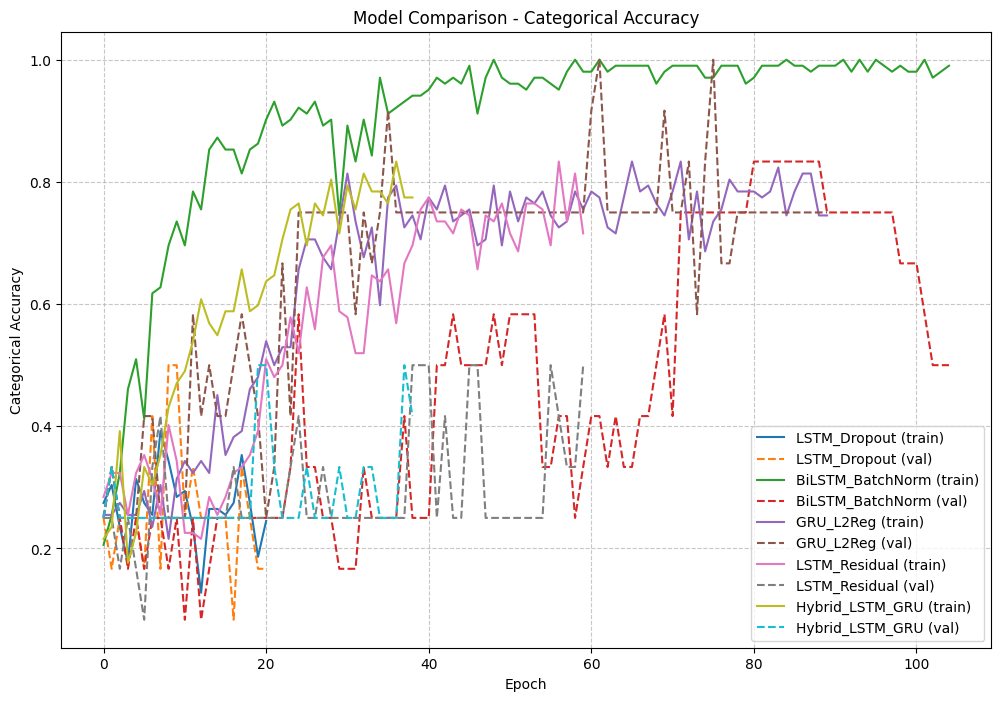

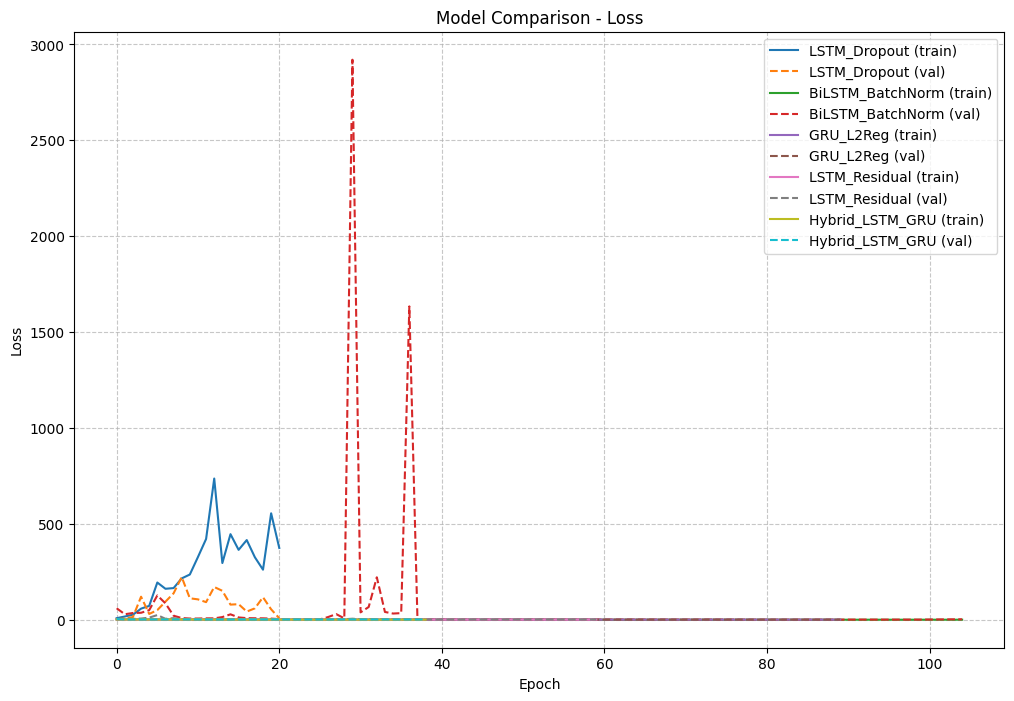

In [152]:
# Function to plot training history for multiple models
def plot_training_comparison(model_histories, metric='categorical_accuracy'):
    plt.figure(figsize=(12, 8))
    
    for model_name, history in model_histories.items():
        # Plot training metric
        plt.plot(history.history[metric], label=f'{model_name} (train)')
        # Plot validation metric
        plt.plot(history.history[f'val_{metric}'], linestyle='--', label=f'{model_name} (val)')
    
    plt.title(f'Model Comparison - {metric.replace("_", " ").title()}')
    plt.xlabel('Epoch')
    plt.ylabel(metric.replace('_', ' ').title())
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Plot accuracy comparison
plot_training_comparison(model_histories, 'categorical_accuracy')

# Plot loss comparison
plot_training_comparison(model_histories, 'loss')

In [153]:
# Create a summary table of model performance
performance_data = []

for model_name in models.keys():
    history = model_histories[model_name]
    
    # Get the best validation accuracy and corresponding epoch
    best_val_epoch = np.argmax(history.history['val_categorical_accuracy'])
    best_val_acc = history.history['val_categorical_accuracy'][best_val_epoch]
    
    # Get the final training accuracy
    final_train_acc = history.history['categorical_accuracy'][-1]
    
    # Get test accuracy
    test_acc = test_accuracies[model_name]
    
    # Calculate training time
    training_time = model_training_times[model_name]
    
    # Calculate overfitting (difference between training and validation)
    overfitting = final_train_acc - history.history['val_categorical_accuracy'][-1]
    
    performance_data.append({
        'Model': model_name,
        'Best Val Accuracy': best_val_acc,
        'Test Accuracy': test_acc,
        'Training Time (s)': training_time,
        'Overfitting': overfitting
    })

# Create and display DataFrame
performance_df = pd.DataFrame(performance_data)
performance_df = performance_df.sort_values('Test Accuracy', ascending=False).reset_index(drop=True)
performance_df

,Model,Best Val Accuracy,Test Accuracy,Training Time (s),Overfitting
0,BiLSTM_BatchNorm,0.833333,1.000000,58.337671,0.490196
1,GRU_L2Reg,1.000000,0.666667,31.182160,-0.004902
2,LSTM_Dropout,0.500000,0.500000,15.991583,0.078431
3,LSTM_Residual,0.500000,0.500000,17.493857,0.215686
4,Hybrid_LSTM_GRU,0.500000,0.166667,17.651946,0.357843


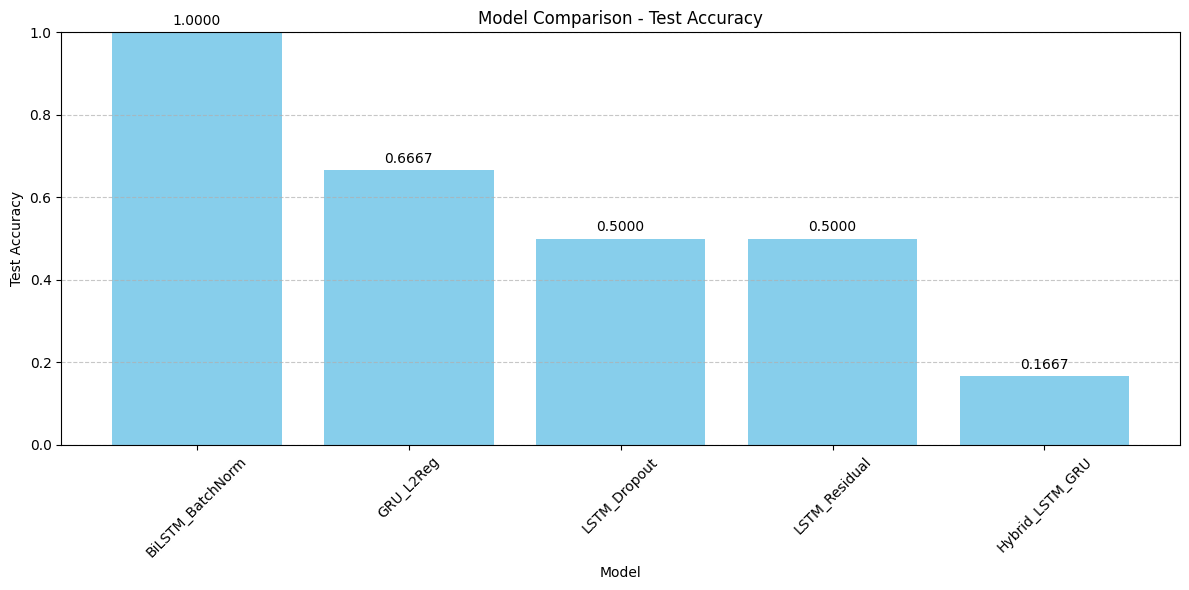

In [154]:
# Plot bar chart of test accuracies
plt.figure(figsize=(12, 6))
bars = plt.bar(performance_df['Model'], performance_df['Test Accuracy'], color='skyblue')

# Add data labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.4f}', ha='center', va='bottom')

plt.title('Model Comparison - Test Accuracy')
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.ylim(0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 9. Save Best Model

Let's save the best performing model for future use.

In [155]:
# Get the best model based on test accuracy
best_model_name = performance_df.iloc[0]['Model']
print(f"Best model based on test accuracy: {best_model_name}")

# Load the best model (the one saved during training)
best_model_path = os.path.join(models_dir, f'{best_model_name}.keras')
best_model = tf.keras.models.load_model(best_model_path)

# Save it with a descriptive name
best_model.save('best_sign_language_model.keras')
print(f"Best model saved as 'best_sign_language_model.keras'")

Best model based on test accuracy: BiLSTM_BatchNorm
Best model saved as 'best_sign_language_model.keras'


# 11. Test Best Model in Real Time

Let's test our best model in a real-time setting.

In [ ]:
# Define visualization function for action probabilities
def prob_viz(res, actions, input_frame, colors=None):
    output_frame = input_frame.copy()
    
    # If colors are not provided, generate them
    if colors is None:
        # Generate distinct colors for each action
        colors = [(245, 117, 16), (117, 245, 16), (16, 117, 245), (245, 16, 117)]
        if len(actions) > len(colors):
            import random
            for _ in range(len(actions) - len(colors)):
                colors.append((random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)))
    
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    return output_frame

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

# Generate distinct colors for visualization
colors = [(245, 117, 16), (117, 245, 16), (16, 117, 245), (245, 16, 117)]

# Load the best model for real-time testing
model = best_model

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

I0000 00:00:1744518688.601407   90020 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1744518688.603160  166160 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 25.0.3-arch1.1), renderer: AMD Radeon 680M (radeonsi, rembrandt, LLVM 19.1.7, DRM 3.61, 6.14.1-arch1-1)
W0000 00:00:1744518688.644669  166142 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744518688.660989  166141 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744518688.663695  166147 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744518688.664253  166155 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabl

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

NameError: name 'prob_viz' is not defined